In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(n_features):
    return np.random.rand(n_features + 1)

# Load the diabetes dataset from CSV file
def load_diabetes(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

# Split dataset into training, validation, and test sets
def split_dataset(X, y, train_ratio, val_ratio):
    total_samples = len(X)
    train_size = int(total_samples * train_ratio)
    val_size = int(total_samples * val_ratio)
    X_train, y_train = X[:train_size], y[:train_size]
    X_temp, X_val, y_temp, y_val = X[train_size:train_size+val_size], X[train_size+val_size:], y[train_size:train_size+val_size], y[train_size+val_size:]
    return X_train, y_train, X_val, y_val, X_temp, y_temp

# Binary Logistic Regression
def binary_logistic_regression(X_train, y_train, X_val, y_val, lr, max_iter):
    n_features = X_train.shape[1]
    theta = initialize_parameters(n_features)
    history = []

    N_train = len(X_train)
    for itr in range(1, max_iter + 1):
        total_cost = 0
        grad = np.zeros(n_features + 1)

        for i in range(N_train):
            x_i = np.append(X_train[i], 1)  # Adding bias term
            z = np.dot(x_i, theta)
            h = sigmoid(z)
            J = - y_train[i] * np.log(h) - (1 - y_train[i]) * np.log(1 - h)
            total_cost += J
            grad += np.dot(x_i, h - y_train[i])

        total_cost /= N_train
        grad /= N_train
        theta -= lr * grad

        history.append(total_cost)

    correct = 0
    for i in range(len(X_val)):
        x_i = np.append(X_val[i], 1)
        z = np.dot(x_i, theta)
        h = sigmoid(z)
        prediction = 1 if h >= 0.5 else 0
        if prediction == y_val[i]:
            correct += 1

    val_acc = correct * 100 / len(X_val)
    return val_acc, history, theta

# Load the diabetes dataset from CSV file
X, y = load_diabetes("diabetes.csv")

# Split dataset into training, validation, and test sets
X_train, y_train, X_val, y_val, X_temp, y_temp = split_dataset(X, y, 0.7, 0.15)
X_test, y_test = X_temp, y_temp

# Training settings
lr_list = [0.1, 0.01, 0.001, 0.0001]
max_iter = 500

# Evaluate different learning rates
best_lr = None
best_val_acc = 0

for lr in lr_list:
    val_acc, history, theta = binary_logistic_regression(X_train, y_train, X_val, y_val, lr, max_iter)
    print(f"Learning Rate: {lr}, Validation Accuracy: {val_acc:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr

# Test accuracy with best learning rate
test_acc, _, _ = binary_logistic_regression(X_train, y_train, X_test, y_test, best_lr, max_iter)
print(f"Test Accuracy with best LR: {best_lr}, Max Iter: {max_iter}:, Test Accuracy: {test_acc:.2f}%")

<ipython-input-13-b7bf6e00d1dc>:43: RuntimeWarning: divide by zero encountered in log
  J = - y_train[i] * np.log(h) - (1 - y_train[i]) * np.log(1 - h)
<ipython-input-13-b7bf6e00d1dc>:43: RuntimeWarning: invalid value encountered in double_scalars
  J = - y_train[i] * np.log(h) - (1 - y_train[i]) * np.log(1 - h)
<ipython-input-13-b7bf6e00d1dc>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Learning Rate: 0.1, Validation Accuracy: 52.59%
Learning Rate: 0.01, Validation Accuracy: 38.79%
Learning Rate: 0.001, Validation Accuracy: 62.07%
Learning Rate: 0.0001, Validation Accuracy: 54.31%
Test Accuracy with best LR: 0.001, Max Iter: 500:, Test Accuracy: 70.43%


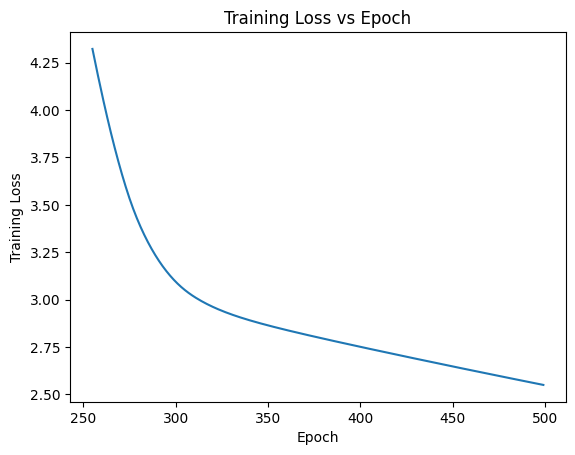

In [ ]:
# Plotting training loss
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.show()